In [1]:
import matplotlib.pyplot as plt
from IPython.display import display
import sys
import pandas as pd

In [2]:
# Specify global paths
figures_dir = '/home/sirush/Dropbox/Research/PhD/LatexFiles/Dissertation/Figures/'
# filename1 will be used for the figure where the Multiple Parameter Space is used to compare against
# the Re values used to generate it
filename1 = 'ODECO_Transient_Channel_Not_Generated_From.png'
beamer_file1 = 'ODECO_Transient_Channel_Not_Generated_From_Re=10_25.png'
beamer_file2 = 'ODECO_Transient_Channel_Not_Generated_From_Re=50_75.png'

In [3]:
# Add the Results folders of the different components
# Forward Problem
FP_dir = '/home/sirush/PhDResearch/MMS_Transient_Channel/ForwardProblem/Log_Files/'
ODECO_multiple_dir = '/home/sirush/PhDResearch/MMS_Transient_Channel/ODECO/Log_Files/MultipleParameterSpace/'

In [4]:
# Read in the data from the forward problem
viento_log = 'log_Re{10,25,50,75}_nxnt{24,36,48,60,72}_short.txt'
viento_data = pd.read_csv(FP_dir+viento_log, sep=' ')

# Read in the data from the ODECO problem solved in the Multiple Parameter Space
ODECO_multiple_log = 'log_multiple_ODECO_non_generated_short.txt'
ODECO_multiple_data = pd.read_csv(ODECO_multiple_dir+ODECO_multiple_log, sep = ' ')

In [5]:
viento_data

,tFinal,Re,nx,nSteps,uErr,pErr,Runtime
0,1,10,24,24,0.000049,0.000123,68.7062
1,1,10,36,36,0.000019,0.000273,227.1750
2,1,10,48,48,0.000010,0.000946,579.5220
3,1,10,60,60,0.000006,0.002499,1231.6300
4,1,10,72,72,0.000004,0.005222,2261.2300
5,1,25,24,24,0.000071,0.000058,65.4305
6,1,25,36,36,0.000032,0.000238,212.4220
7,1,25,48,48,0.000019,0.000250,520.2450
8,1,25,60,60,0.000012,0.000407,1075.7100
9,1,25,72,72,0.000009,0.000818,1956.2200


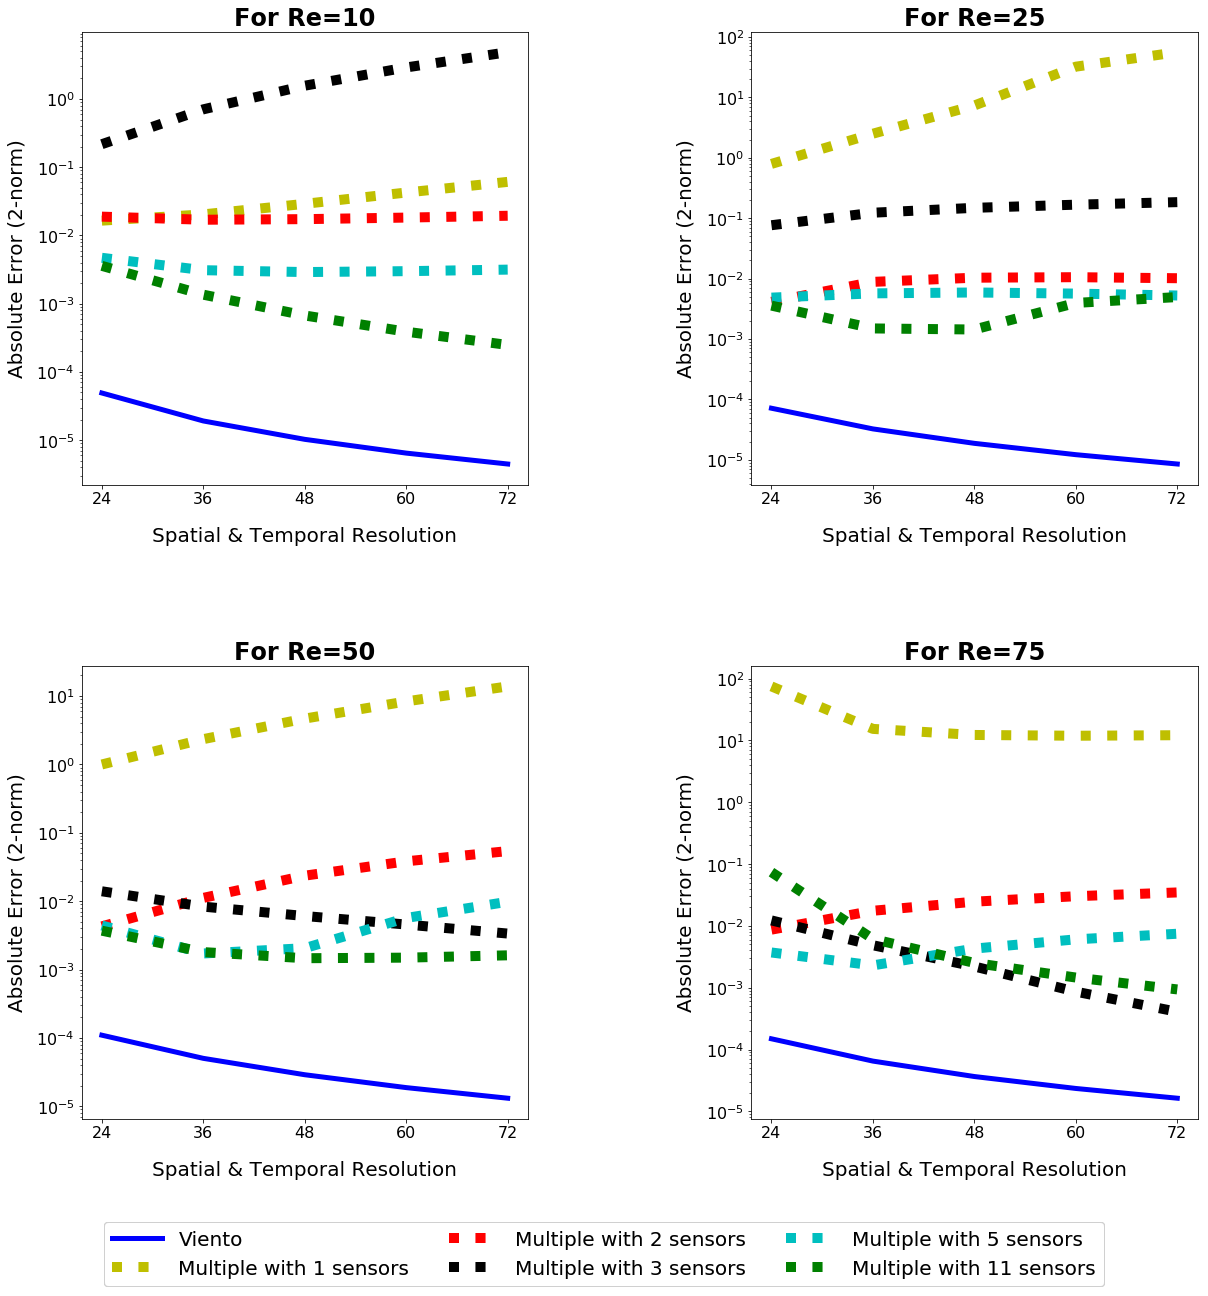

In [7]:
# Purpose is to show how MPS ODECO does for Re not used to generate the POD basis
# for Re=10,25,50,75

# plt.figure automatically assigns a fignum of 1
# figsize(width, height)
plt.figure(1,figsize=(20,20)).subplots_adjust(wspace=.5,hspace=.4) 
# Define the counter for the subplots
counter = 0
# Define a Dictionary of markers (b- is default)
markers_multiple = {1:'y-',2:'r-',3:'k-',5:'c-',11:'g-'}

for Re in viento_data['Re'].unique():
    # Get the data for the value of Re
    viento = viento_data[viento_data['Re'].eq(Re)]
    ODECO_multiple = ODECO_multiple_data[ODECO_multiple_data['Re'].eq(Re)]
    
    # Define the appropriate subplot
    counter += 1
    # Indexing for a sublot for figure #
    # works by specifying num rows, num cols, subplot num
    plt.subplot(int('22{}'.format(counter)))
    # Plot the Viento data
    plt.plot(viento['nx'].unique(),
            viento['uErr'],
            label='Viento',
            color='b',
            linewidth=5.0)   
    # Plot the ODECO data for the Single Parameter Space for the number of sensors used
    for sensors in ODECO_multiple['numSensors'].unique():                  
        # Plot the approximation error for the Multiple Space
        plt.plot(ODECO_multiple['nx'].unique(),
                ODECO_multiple[ODECO_multiple['numSensors'].eq(sensors)]['uErr2'],
                markers_multiple[sensors],
                label='Multiple with {} sensors'.format(sensors),
                linestyle='dotted',
                linewidth=10.0,
                markersize=10.0)        
    
    # Define the axes
    plt.xlabel('Spatial & Temporal Resolution',weight='medium',size=20,labelpad=20)
    plt.ylabel('Absolute Error (2-norm)',weight='medium',size=20,labelpad=10)
    # Set ticks on the x-axis
    plt.xticks(ODECO_multiple['nx'].unique(),size=16)
    # Specify the location of the legend
    plt.figlegend(handlelength=2.5, loc='lower center',ncol=3,fontsize=20)
    # Set the y-axis to be log-scaled
    plt.yscale('log')
    plt.yticks(size=16)
    plt.title('For Re={}'.format(Re),weight='bold',size=24)
    
    
plt.savefig(figures_dir+filename1, 
            bbox_inches='tight', pad_inches=0.1)

plt.show() # Creates a new figure

inv_data.columns.values

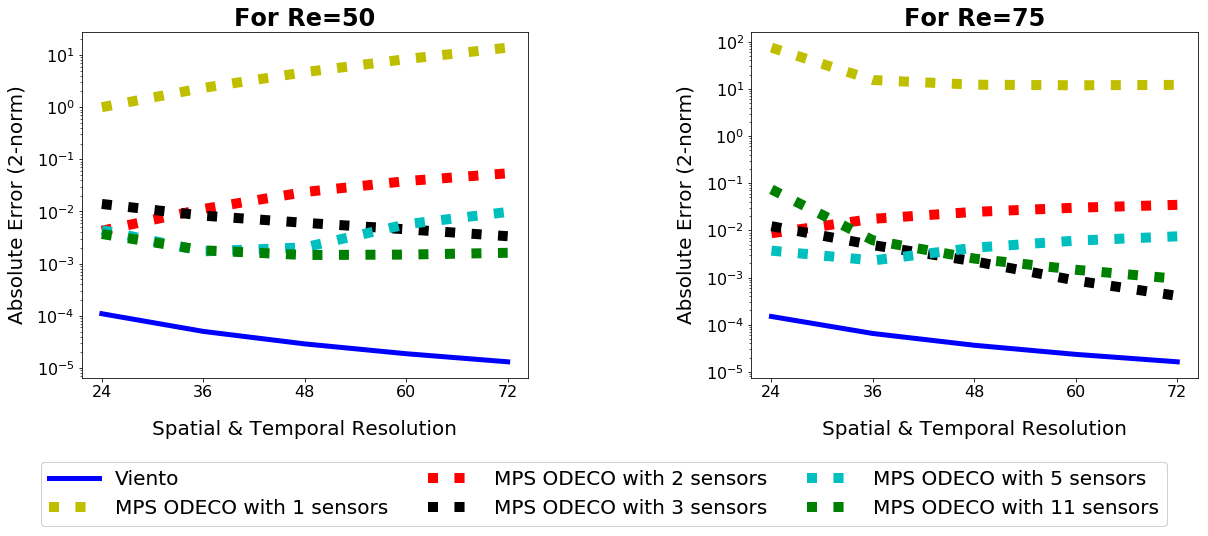

In [10]:
# Purpose is to show how MPS ODECO does for Re not used to generate the POD basis
# for Re=10,25,50,75

# plt.figure automatically assigns a fignum of 1
# figsize(width, height)
plt.figure(2,figsize=(20,8)).subplots_adjust(wspace=.5,bottom=.28) 
# Define the counter for the subplots
counter = 0
# Define a Dictionary of markers (b- is default)
markers_multiple = {1:'y-',2:'r-',3:'k-',5:'c-',11:'g-'}

list1 = [10,25]
list2 = [50,75]

for Re in list2:
    # Get the data for the value of Re
    viento = viento_data[viento_data['Re'].eq(Re)]
    ODECO_multiple = ODECO_multiple_data[ODECO_multiple_data['Re'].eq(Re)]
    
    # Define the appropriate subplot
    counter += 1
    # Indexing for a sublot for figure #
    # works by specifying num rows, num cols, subplot num
    plt.subplot(int('12{}'.format(counter)))
    # Plot the Viento data
    plt.plot(viento['nx'].unique(),
            viento['uErr'],
            label='Viento',
            color='b',
            linewidth=5.0)   
    # Plot the ODECO data for the Single Parameter Space for the number of sensors used
    for sensors in ODECO_multiple['numSensors'].unique():                  
        # Plot the approximation error for the Multiple Space
        plt.plot(ODECO_multiple['nx'].unique(),
                ODECO_multiple[ODECO_multiple['numSensors'].eq(sensors)]['uErr2'],
                markers_multiple[sensors],
                label='MPS ODECO with {} sensors'.format(sensors),
                linestyle='dotted',
                linewidth=10.0,
                markersize=10.0)        
    
    # Define the axes
    plt.xlabel('Spatial & Temporal Resolution',weight='medium',size=20,labelpad=20)
    plt.ylabel('Absolute Error (2-norm)',weight='medium',size=20,labelpad=10)
    # Set ticks on the x-axis
    plt.xticks(ODECO_multiple['nx'].unique(),size=16)
    # Specify the location of the legend
    plt.figlegend(handlelength=2.5, loc='lower center',ncol=3,fontsize=20)
    # Set the y-axis to be log-scaled
    plt.yscale('log')
    plt.yticks(size=16)
    plt.title('For Re={}'.format(Re),weight='bold',size=24)
    
    
plt.savefig(figures_dir+beamer_file2, 
            bbox_inches='tight', pad_inches=0.1)

plt.show() # Creates a new figure